# Objective: Analyze how age, gender, employment status, marital status, education and income relate to average number of books an individual reads per month. 

## This data source comes from [https://www.kaggle.com/datasets/vipulgote4/reading-habit-dataset/data](https://www.kaggle.com/datasets/vipulgote4/reading-habit-dataset/data).

### This data might answer the objective because it contains data for almost 3000 individuals on their reading habits, personal income, employment status, age and other information.

#### The following code cell uses Pandas to load the data Reading-Habit-Dataset.

In [1]:
import pandas as pd
read_habit = pd.read_csv('Reading_habit_datasetB.csv')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy import stats


#### Let's start looking at the dataframe by displaying the first few rows.  

In [2]:
read_habit.head()

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No


#### Now let's look at the last few rows of the dataframe. 

In [3]:
read_habit.tail()

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
2827,18,Male,White,Never been married,High school graduate,Employed part-time,"$75,000 to under $100,000",0,NaN,NaN,NaN,NaN,Yes,Yes
2828,17,Male,White,Never been married,High school incomplete,Employed part-time,"$30,000 to under $40,000",0,NaN,NaN,NaN,NaN,Yes,No
2829,17,Female,White,Never been married,High school incomplete,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,Yes
2830,16,Male,White,Never been married,High school graduate,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,No
2831,16,Male,White,Never been married,Don’t know,Not employed for pay,Refused,0,NaN,NaN,NaN,NaN,No,No


#### Let's look at the shape of the dataframe - how many row and columns does it have. 

In [4]:
df_shape = read_habit.shape

print(f'The Dataframe has {df_shape[0]} rows and {df_shape[1]} columns.')

The Dataframe has 2832 rows and 14 columns.


#### Here is a summary of the dataframe showing data structure, row count, column details. 

In [5]:
read_habit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Age                                                  2832 non-null   int64 
 1   Sex                                                  2832 non-null   object
 2   Race                                                 2832 non-null   object
 3   Marital status?                                      2832 non-null   object
 4   Education                                            2774 non-null   object
 5   Employement                                          2832 non-null   object
 6   Incomes                                              2832 non-null   object
 7   How many books did you read during last 12months?    2832 non-null   int64 
 8   Read any printed books during last 12months?         2442 non-null   object
 9

#### Let's view a statistical summary of the unaltered/uncleaned dataframe. 

In [6]:
read_habit.describe()

,Age,How many books did you read during last 12months?
count,2832.000000,2832.000000
mean,47.276483,16.676201
std,18.565516,23.632071
min,16.000000,0.000000
25%,32.000000,2.750000
50%,48.000000,6.000000
75%,62.000000,20.000000
max,93.000000,97.000000


#### Let's determine if there are rows and columns with null values. There are null values present in this dataframe.

In [7]:
print(read_habit.isnull().any().any())

True


#### Now let's find out which columns of the dataframe have null values. 

In [8]:
read_habit.isnull().any(axis = 0)

Age                                                    False
Sex                                                    False
Race                                                   False
Marital status?                                        False
Education                                               True
Employement                                            False
Incomes                                                False
How many books did you read during last 12months?      False
Read any printed books during last 12months?            True
Read any audiobooks during last 12months?               True
Read any e-books during last 12months?                  True
Last book you read, you…                                True
Do you happen to read any daily news or newspapers?    False
Do you happen to read any magazines or journals?       False
dtype: bool

#### Let's now look at a list of the columns in the dataframe. 

In [9]:
read_habit.columns

Index(['Age', 'Sex', 'Race', 'Marital status?', 'Education', 'Employement',
       'Incomes', 'How many books did you read during last 12months?',
       'Read any printed books during last 12months?',
       'Read any audiobooks during last 12months?',
       'Read any e-books during last 12months?', 'Last book you read, you…',
       'Do you happen to read any daily news or newspapers?',
       'Do you happen to read any magazines or journals?'],
      dtype='object')

#### Let's show the dataframe columns as a list. 

In [10]:
list(read_habit.columns)

['Age',
 'Sex',
 'Race',
 'Marital status?',
 'Education',
 'Employement',
 'Incomes',
 'How many books did you read during last 12months?',
 'Read any printed books during last 12months?',
 'Read any audiobooks during last 12months?',
 'Read any e-books during last 12months?',
 'Last book you read, you…',
 'Do you happen to read any daily news or newspapers?',
 'Do you happen to read any magazines or journals?']

#### Let's fix the spelling error of the column 'Employement' and change some of the other column titles to increase readability.

In [11]:
read_habit.rename(columns={'Employement' : 'Employment', 
                           'Incomes' : 'Income', 
                           'Marital status?' : 'Marital status', 
                           'How many books did you read during last 12months?' : 'Num bks rd last 12 mos',
                           'Sex' : 'Gender',
                           'Last book you read, you…' : 'How obtained last bk rd'
                           },
                           inplace = True)
read_habit.columns


Index(['Age', 'Gender', 'Race', 'Marital status', 'Education', 'Employment',
       'Income', 'Num bks rd last 12 mos',
       'Read any printed books during last 12months?',
       'Read any audiobooks during last 12months?',
       'Read any e-books during last 12months?', 'How obtained last bk rd',
       'Do you happen to read any daily news or newspapers?',
       'Do you happen to read any magazines or journals?'],
      dtype='object')

#### Let's see how many results are for each status in each range of the Income column.

In [12]:
read_habit['Income'].value_counts()

Income
$100,000 to under $150,000     530
$50,000 to under $75,000       394
$75,000 to under $100,000      316
Refused                        291
$30,000 to under $40,000       265
$20,000 to under $30,000       238
$10,000 to under $20,000       216
9$100,000 to under $150,000    212
$40,000 to under $50,000       207
Less than $10,000              163
Name: count, dtype: int64

#### Let's correct the typo in the Income column entries '9$100,000 to under $150,000' by removing the 9 in front of the dollar sign.

In [13]:
read_habit['Income'] = read_habit['Income'].replace(r'^9\$', '$', regex=True)

read_habit['Income']

0         $20,000 to under $30,000
1                Less than $10,000
2                Less than $10,000
3         $40,000 to under $50,000
4         $10,000 to under $20,000
                   ...            
2827     $75,000 to under $100,000
2828      $30,000 to under $40,000
2829    $100,000 to under $150,000
2830    $100,000 to under $150,000
2831                       Refused
Name: Income, Length: 2832, dtype: object

#### Let's clean up the income data by creating a new column with a single numerical value for income. Let's use a function to create a new column called "Midpoint Income" to hold the numerical midpoint from the range in the 'Income' column. 

In [14]:
def get_midpoint(Income):
    if Income == 'Refused':
        return None   
    if Income == 'Less than $10,000':
        Income_midpoint = '$5000'
    else:
        Income_midpoint = Income
    Income_midpoint = Income_midpoint.replace('$','').replace(',','')
    if 'to' in Income_midpoint:
        bounds = Income_midpoint.split(' to ')
        lower = int(bounds[0])
        if 'under' in bounds[1]:
            upper = int(bounds[1].replace('under ', ''))
        else:
            upper = int(bounds[1])
        return int((lower + upper) / 2)
    else:
        return int(Income_midpoint)

read_habit['Midpoint Income'] = read_habit['Income'].apply(get_midpoint)

read_habit.head()

,Age,Gender,Race,Marital status,Education,Employment,Income,Num bks rd last 12 mos,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,How obtained last bk rd,Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?,Midpoint Income
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes,25000.0
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes,5000.0
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes,5000.0
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No,45000.0
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No,15000.0


#### Let's look at the frequency each income level is located in the dataframe. The decimal point will be removed later when the NaN values are addressed in this column. 

In [15]:
read_habit['Midpoint Income'].value_counts()

Midpoint Income
125000.0    742
62500.0     394
87500.0     316
35000.0     265
25000.0     238
15000.0     216
45000.0     207
5000.0      163
Name: count, dtype: int64

In [16]:
print(read_habit['Midpoint Income'].isnull().sum())

291


#### Above it was determined that the data type for the column, 'Gender', was object. Here is the frequency of each gender in the dataframe. 

In [17]:
read_habit['Gender'].value_counts()

Gender
Female    1479
Male      1353
Name: count, dtype: int64

#### Above it was determined that the data type for the column, 'Marital status', was object. Here is the frequency of each marital status. 

In [18]:
read_habit['Marital status'].value_counts()

Marital status
Married                  1532
Never been married        592
Divorced                  245
Widowed                   191
Living with a partner     141
Single                     60
Separated                  54
Don’t know                 17
Name: count, dtype: int64

In [19]:
read_habit['Marital status'].dtype

dtype('O')

#### Above it was determined that the data type for the column, 'Education', was object. Here is the frequency of each Education status. 

In [20]:
read_habit['Education'].value_counts()

Education
High school graduate                                        688
Some college, no 4-year degree                              651
College graduate                                            597
Post-graduate training/professional school after college    501
High school incomplete                                      263
Technical, trade or vocational school AFTER high school      66
Don’t know                                                    8
Name: count, dtype: int64

#### Above it was determined that the data type for the column, 'Age', was int64. Here is the frequency of each age. 

In [21]:
read_habit['Age'].value_counts()

Age
50    78
65    76
60    72
47    70
16    68
      ..
91     3
89     2
90     2
92     2
93     1
Name: count, Length: 78, dtype: int64

#### Below creates a new column, 'Age group', that groups by age individuals into minors (under age 18), adults (age 18 to 64), and seniors (age 65+). 

In [22]:
def Get_age_group(Age):
    if Age <= 17:
       return 'Child'
    elif Age <= 64:
        return 'Adult'
    else:
        return'Senior'
    
read_habit['Age group'] = read_habit['Age'].apply(Get_age_group)

read_habit.head()

,Age,Gender,Race,Marital status,Education,Employment,Income,Num bks rd last 12 mos,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,How obtained last bk rd,Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?,Midpoint Income,Age group
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes,25000.0,Senior
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes,5000.0,Adult
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes,5000.0,Adult
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No,45000.0,Adult
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No,15000.0,Child


#### The new 'Age group' column is of the data type object. 

In [23]:
print(read_habit['Age group'].dtype)

object


#### Above it was determined that the data type for the column, 'Employment', was object. Here is the frequency of each employment status. 

In [24]:
read_habit['Employment'].value_counts()

Employment
Employed full-time                 1238
Retired                             605
Not employed for pay                474
Employed part-time                  355
Disabled                             70
Have own business/self-employed      53
Student                              22
Other                                15
Name: count, dtype: int64

#### Above it was determined that the data type for the column, 'Num bks rd last 12 mos', was int64. Here is the frequency of each entry for this column. 

In [25]:
read_habit['Num bks rd last 12 mos'].value_counts()

Num bks rd last 12 mos
0     390
3     209
6     172
2     169
5     167
4     166
10    162
20    159
12    159
1     149
97    124
30    109
50    108
15    103
25     82
8      69
40     53
7      49
24     35
60     19
36     16
96     15
35     15
75     14
13     12
16     11
9      11
18     10
70     10
14      9
45      7
80      6
17      6
48      5
11      4
32      3
55      3
47      2
52      2
90      2
26      2
65      2
67      1
76      1
84      1
54      1
42      1
43      1
51      1
19      1
38      1
22      1
23      1
37      1
Name: count, dtype: int64

#### The columns asking if daily news, newspapers, magazines or journals, the columns about if the books were printed, audio or electronic, and how the books were obtained. The main purpose of the data analysis concerns books read. Daily news, newspapers, magazines and journals are usually shorter than books and are not of interest with this analysis project. It is not of interest if the books were printed, audio, or electronic or how the books were obtained. Additionally, race will be dropped as this is not of interest in this project.

In [26]:
read_habit = read_habit.drop(
    [
    'Race',
    'Read any printed books during last 12months?',
    'Read any audiobooks during last 12months?',
    'Read any e-books during last 12months?', 
    'How obtained last bk rd',
    'Do you happen to read any daily news or newspapers?',
    'Do you happen to read any magazines or journals?', 
    ],
    axis=1
)

read_habit.head()

,Age,Gender,Marital status,Education,Employment,Income,Num bks rd last 12 mos,Midpoint Income,Age group
0,66,Male,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,25000.0,Senior
1,46,Male,Married,High school graduate,Employed full-time,"Less than $10,000",97,5000.0,Adult
2,32,Male,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,5000.0,Adult
3,27,Male,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,45000.0,Adult
4,16,Female,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,15000.0,Child


#### Below the average number of books read per month is calculated and entered into a new columnm, 'Ave books read per month'.

In [27]:
read_habit['Ave books read per month'] = (read_habit['Num bks rd last 12 mos'] / 12).round(2)

print(read_habit['Ave books read per month'].dtype)

read_habit.head()

float64


,Age,Gender,Marital status,Education,Employment,Income,Num bks rd last 12 mos,Midpoint Income,Age group,Ave books read per month
0,66,Male,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,25000.0,Senior,8.08
1,46,Male,Married,High school graduate,Employed full-time,"Less than $10,000",97,5000.0,Adult,8.08
2,32,Male,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,5000.0,Adult,8.08
3,27,Male,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,45000.0,Adult,8.08
4,16,Female,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,15000.0,Child,8.08


#### It was determined above that there are null/NaN values in the data frame. Let's determine in what columns null/NaN values exist in the data frame. 

In [28]:
nan_counts_per_column = read_habit.isna().sum()
print(nan_counts_per_column)


Age                           0
Gender                        0
Marital status                0
Education                    58
Employment                    0
Income                        0
Num bks rd last 12 mos        0
Midpoint Income             291
Age group                     0
Ave books read per month      0
dtype: int64


#### Now let's determine in what rows null/NaN values exist in the data frame. 

In [29]:
nan_rows = read_habit[read_habit.isna().any(axis=1)]
print(nan_rows)


      Age  Gender      Marital status  \
17     80  Female             Widowed   
23     77  Female             Married   
27     73    Male             Widowed   
34     69  Female          Don’t know   
37     67    Male             Married   
...   ...     ...                 ...   
2787   32    Male             Married   
2794   30    Male             Married   
2805   27    Male             Married   
2809   26    Male             Married   
2831   16    Male  Never been married   

                                              Education            Employment  \
17    Post-graduate training/professional school aft...               Retired   
23                                 High school graduate  Not employed for pay   
27    Post-graduate training/professional school aft...               Retired   
34    Post-graduate training/professional school aft...               Retired   
37                       Some college, no 4-year degree               Retired   
...                  

#### Below we find that the Midpoint Income column is slightly right-skewed, meaning that there are a few higher income values that are pulling the distribution right, but the skew is mild. 

In [30]:
income_skew = read_habit['Midpoint Income'].skew()
print(f"Skewness of income: {income_skew}")

Skewness of income: 0.15802977169345025


#### Let's drop the rows that contain null/NaN values (where respondent refused to provide their income) from the Midpoint Income column. This represents 291 rows from the 2831 total. Analyst considered using the median income value, but there was concern that the Midpoint Income statistic overview might be skewed by entering the median values. Additionally, 291 represented only 10.2% of dataframe. 

In [31]:
read_habit = read_habit.dropna(subset=['Midpoint Income'])

print(read_habit.head())

   Age  Gender      Marital status               Education  \
0   66    Male            Divorced        College graduate   
1   46    Male             Married    High school graduate   
2   32    Male  Never been married    High school graduate   
3   27    Male             Married    High school graduate   
4   16  Female  Never been married  High school incomplete   

           Employment                    Income  Num bks rd last 12 mos  \
0             Retired  $20,000 to under $30,000                      97   
1  Employed full-time         Less than $10,000                      97   
2  Employed full-time         Less than $10,000                      97   
3  Employed full-time  $40,000 to under $50,000                      97   
4  Employed part-time  $10,000 to under $20,000                      97   

   Midpoint Income Age group  Ave books read per month  
0          25000.0    Senior                      8.08  
1           5000.0     Adult                      8.08  
2    

#### Let's eliminate the decimal point for the values in midpoint and update the data type to Int64. This couldn't be done sooner, because NaN values were in the column. 

In [32]:
read_habit['Midpoint Income'] = read_habit['Midpoint Income'].astype('int64')

print(read_habit['Midpoint Income'].dtype)

read_habit.head()

int64


,Age,Gender,Marital status,Education,Employment,Income,Num bks rd last 12 mos,Midpoint Income,Age group,Ave books read per month
0,66,Male,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,25000,Senior,8.08
1,46,Male,Married,High school graduate,Employed full-time,"Less than $10,000",97,5000,Adult,8.08
2,32,Male,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,5000,Adult,8.08
3,27,Male,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,45000,Adult,8.08
4,16,Female,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,15000,Child,8.08


In [33]:
read_habit['Midpoint Income'].value_counts

<bound method IndexOpsMixin.value_counts of 0        25000
1         5000
2         5000
3        45000
4        15000
         ...  
2826      5000
2827     87500
2828     35000
2829    125000
2830    125000
Name: Midpoint Income, Length: 2541, dtype: int64>

#### Below it is determined that there are 54 NaN values in the Education column. 

In [34]:
nan_counts_per_column = read_habit.isna().sum()
print(nan_counts_per_column)


Age                          0
Gender                       0
Marital status               0
Education                   54
Employment                   0
Income                       0
Num bks rd last 12 mos       0
Midpoint Income              0
Age group                    0
Ave books read per month     0
dtype: int64


#### In the Education column the Nan values will be replaced with 'No response' to clean the data. 'No response' filling was  chosen versus deleting the rows as the values are not numerical and another object/string value can be used to account for the NaN rows. 

In [35]:
read_habit['Education'] = read_habit['Education'].fillna('No response')



#### Below checks to ensure that the NaN values have been replaced wtih 'No response' in the Education column. 

In [36]:
nan_counts_per_column = read_habit.isna().sum()
print(nan_counts_per_column)

Age                         0
Gender                      0
Marital status              0
Education                   0
Employment                  0
Income                      0
Num bks rd last 12 mos      0
Midpoint Income             0
Age group                   0
Ave books read per month    0
dtype: int64


#### Below checks that all the cells are now non-null values. 

In [37]:
read_habit.info()



<class 'pandas.core.frame.DataFrame'>
Index: 2541 entries, 0 to 2830
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2541 non-null   int64  
 1   Gender                    2541 non-null   object 
 2   Marital status            2541 non-null   object 
 3   Education                 2541 non-null   object 
 4   Employment                2541 non-null   object 
 5   Income                    2541 non-null   object 
 6   Num bks rd last 12 mos    2541 non-null   int64  
 7   Midpoint Income           2541 non-null   int64  
 8   Age group                 2541 non-null   object 
 9   Ave books read per month  2541 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 218.4+ KB


#### Let's take another look at the descriptive stats for the data frame now that the cleaning and adjustments to data have been completed. 

In [38]:
df_end_shape = read_habit.shape

print(f'The cleaned Dataframe has {df_end_shape[0]} rows and {df_end_shape[1]} columns.')

The cleaned Dataframe has 2541 rows and 10 columns.


In [39]:
read_habit.describe()

,Age,Num bks rd last 12 mos,Midpoint Income,Ave books read per month
count,2541.000000,2541.000000,2541.000000,2541.000000
mean,46.069264,16.730815,68327.430146,1.394116
std,18.335390,23.706272,42714.968509,1.975181
min,16.000000,0.000000,5000.000000,0.000000
25%,31.000000,3.000000,35000.000000,0.250000
50%,47.000000,7.000000,62500.000000,0.580000
75%,60.000000,20.000000,125000.000000,1.670000
max,93.000000,97.000000,125000.000000,8.080000


#### Here is a plot of age versus number of books read per month.

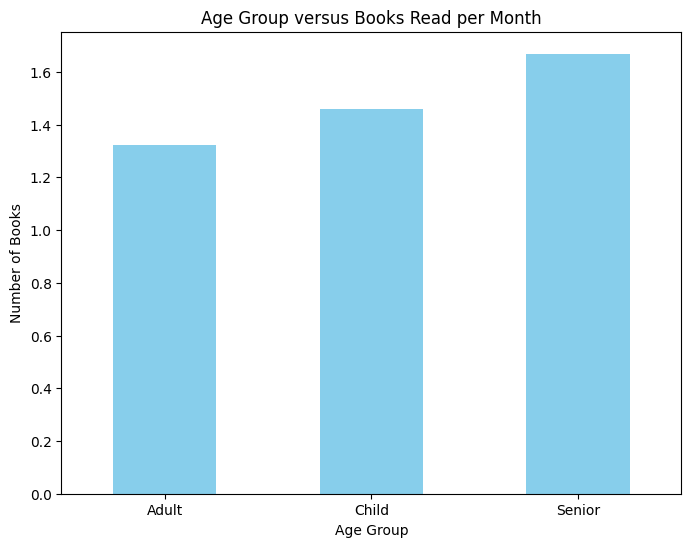

In [40]:
avg_books_per_age = read_habit.groupby('Age group')['Ave books read per month'].mean()

plt.figure(figsize=(8, 6))
avg_books_per_age.plot(kind = 'bar', color = 'skyblue')
plt.title('Age Group versus Books Read per Month')
plt.xlabel('Age Group')
plt.ylabel('Number of Books')
plt.xticks(rotation=0)
plt.show()

#### Below an ANOVA test was completed to compare average books read per month wtih education level and it was determined that there is a statistically significant diference in the average number of books read per month based on age group

In [41]:
groups = [group['Ave books read per month'].values for name, group in read_habit.groupby('Age group')]

f_statistic, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant differece in the number of books read per month based on age group.")
else:
    print("There is no significant diference in the number of books read per month based on age group.")

F-statistic: 5.992083524606975
P-value: 0.002533937379495984
There is a significant differece in the number of books read per month based on age group.


#### Below is the calculation of the Pearson correlation coefficient for Age to Average books read per month. The coefficient is close to zero therefore there is no meaningful correlation between age adn average books read per month. 

In [42]:
read_habit[['Age', 'Ave books read per month']].corr(method='pearson')


,Age,Ave books read per month
Age,1.000000,0.059526
Ave books read per month,0.059526,1.000000


#### Here is a plot of age group versus after books read per month.  

#### Here is a plot of gender versus after books read per month. There is a signifcant difference in the number of books read per month per gender, with females reading more books than males. 

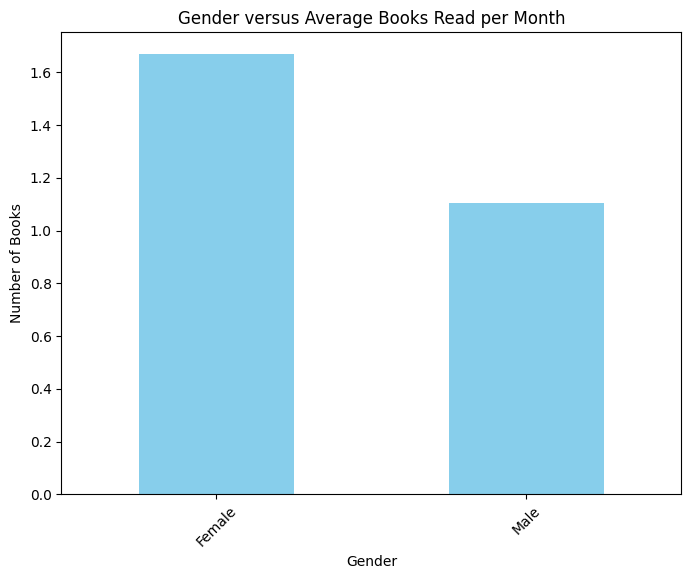

In [62]:
avg_books_per_midpoint_income = read_habit.groupby('Gender')['Ave books read per month'].mean()

plt.figure(figsize=(8, 6))
avg_books_per_midpoint_income.plot(kind = 'bar', color = 'skyblue')
plt.title('Gender versus Average Books Read per Month')
plt.xlabel('Gender')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

In [44]:
groups = [group['Ave books read per month'].values for name, group in read_habit.groupby('Gender')]

f_statistic, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in the number of books read per month based on gender.")
else:
    print("There is no significant difference in the number of books read per month based on gender.")

F-statistic: 52.65974544517804
P-value: 5.245444317203456e-13
There is a significant difference in the number of books read per month based on gender.


#### Here is a plot of income versus after books read per month.

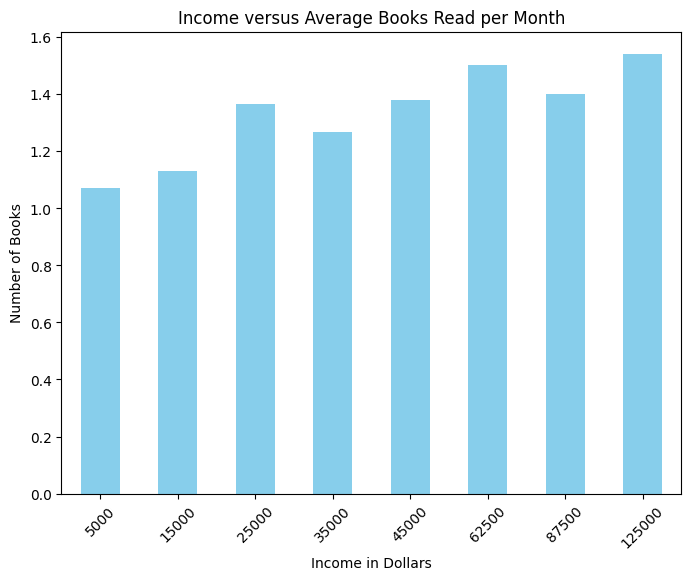

In [45]:
avg_books_per_midpoint_income = read_habit.groupby('Midpoint Income')['Ave books read per month'].mean()

plt.figure(figsize=(8, 6))
avg_books_per_midpoint_income.plot(kind = 'bar', color = 'skyblue')
plt.title('Income versus Average Books Read per Month')
plt.xlabel('Income in Dollars')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

#### Below is the Pearson Correlation for Midpoint Income to Average Books Read per Month. The Pearson correlation coefficient is close to zero, meaning that income does not seem to predict how many books people read per month. 

In [46]:
read_habit[['Midpoint Income', 'Ave books read per month']].corr(method='pearson')


,Midpoint Income,Ave books read per month
Midpoint Income,1.000000,0.064807
Ave books read per month,0.064807,1.000000


#### Below a dictionary of shortened labels for use in bar chart was created. A plot of education versus average books read per month is created with the shortened labels. 

In [47]:
short_labels = {
    'College graduate' : 'Undergrad',
    'High school graduate' : 'H.S.',
    'High school incomplete' : 'H.S. incomplete',
    'Post-graduate training/professional school after college' : 'Grad School',
    'Some college, no 4-year degree' : 'Some college',
    'Technical, trade or vocational school AFTER high school' : 'Trade school',
    'Don\'t know' : 'Unknown',
    'No response' : 'No response'
}

read_habit['Education'] = read_habit['Education'].str.strip() 

print(short_labels)

{'College graduate': 'Undergrad', 'High school graduate': 'H.S.', 'High school incomplete': 'H.S. incomplete', 'Post-graduate training/professional school after college': 'Grad School', 'Some college, no 4-year degree': 'Some college', 'Technical, trade or vocational school AFTER high school': 'Trade school', "Don't know": 'Unknown', 'No response': 'No response'}


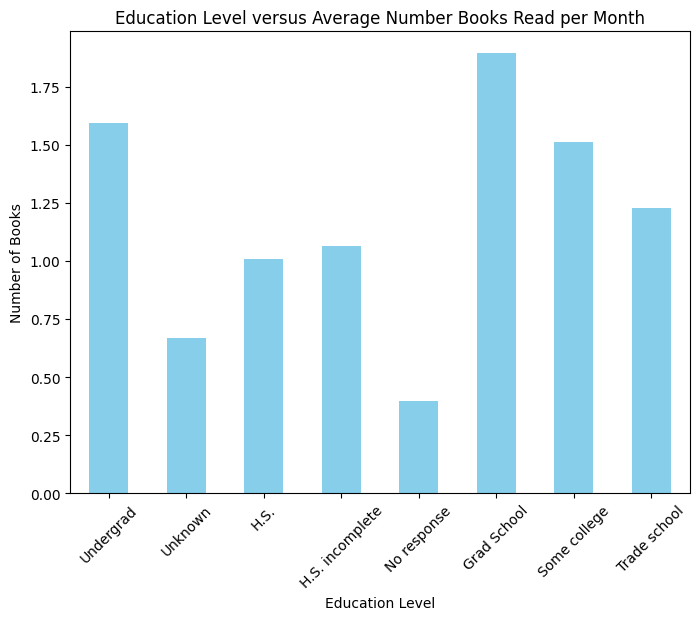

In [48]:
avg_books_per_education = read_habit.groupby('Education')['Ave books read per month'].mean()

shortened_labels = avg_books_per_education.index.map(short_labels).fillna('Unknown')

plt.figure(figsize=(8, 6))
avg_books_per_education.plot(kind = 'bar', color = 'skyblue')
plt.title('Education Level versus Average Number Books Read per Month')
plt.xlabel('Education Level')
plt.ylabel('Number of Books')
plt.xticks(ticks=range(len(shortened_labels)), labels=shortened_labels, rotation=45)
plt.show()

#### Below an ANOVA test was completed to compare average books read per month wtih education level and it was determined that there is a statistically significant diference in the average number of books read per month based on educational level. 

In [49]:
groups = [group['Ave books read per month'].values for name, group in read_habit.groupby('Education')]

f_statistic, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in the number of books read per month based on educational level.")
else:
    print("There is no significant difference in the number of books read per month based on educational level.")

F-statistic: 11.802362349297741
P-value: 7.210708267923423e-15
There is a significant difference in the number of books read per month based on educational level.


#### Again a dictionary with shortened labels was created for the Marital Status column. Here is a plot of marital status versus average number of books read per month.

In [50]:
short_labels_marital = {
    'Living with a partner' : 'Cohabitating',
    'Never been married' : 'Never married',
    'Don\'t know' : 'Unknown',
    'Divorced' : 'Divorced',
    'Married' : 'Married',
    'Single' : 'Single',
    'Separated' : 'Separated',
    'Widowed' : 'Widowed'
}

print(short_labels_marital)


{'Living with a partner': 'Cohabitating', 'Never been married': 'Never married', "Don't know": 'Unknown', 'Divorced': 'Divorced', 'Married': 'Married', 'Single': 'Single', 'Separated': 'Separated', 'Widowed': 'Widowed'}


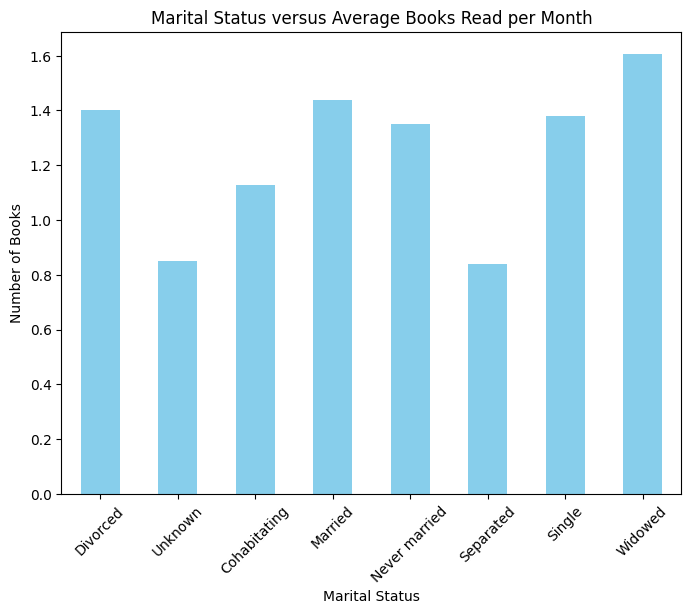

In [51]:
avg_books_per_marital_status = read_habit.groupby('Marital status')['Ave books read per month'].mean()

shortened_labels_marital = avg_books_per_marital_status.index.map(short_labels_marital).fillna('Unknown')

plt.figure(figsize=(8, 6))
avg_books_per_marital_status.plot(kind = 'bar', color = 'skyblue')
plt.title('Marital Status versus Average Books Read per Month')
plt.xlabel('Marital Status')
plt.ylabel('Number of Books')
plt.xticks(ticks=range(len(shortened_labels_marital)), labels=shortened_labels_marital, rotation=45)
plt.show()

#### Below an ANOVA test was completed to compare average books read per month wtih education level and it was determined that there is no statistically significant diference in the average number of books read per month based on marital status. 

In [52]:
groups = [group['Ave books read per month'].values for name, group in read_habit.groupby('Marital status')]

f_statistic, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in the number of books read per month based on marital status.")
else:
    print("There is no significant difference in the number of books read per month based on marital status.")

F-statistic: 1.3828350369133562
P-value: 0.20800124978897028
There is no significant difference in the number of books read per month based on marital status.


In [53]:
short_labels_employment = {
    'Disabled' : 'Disabled',
    'Employed full-time' : 'Full-time',
    'Employed part-time' : 'Part-time',
    'Have own business/self-employed' : 'Self-employed',
    'Other' : 'Other',
    'Not employed for pay' : 'Not paid',
    'Retired' : 'Retired',
    'Student' : 'Student',
}

print(short_labels_employment)

{'Disabled': 'Disabled', 'Employed full-time': 'Full-time', 'Employed part-time': 'Part-time', 'Have own business/self-employed': 'Self-employed', 'Other': 'Other', 'Not employed for pay': 'Not paid', 'Retired': 'Retired', 'Student': 'Student'}


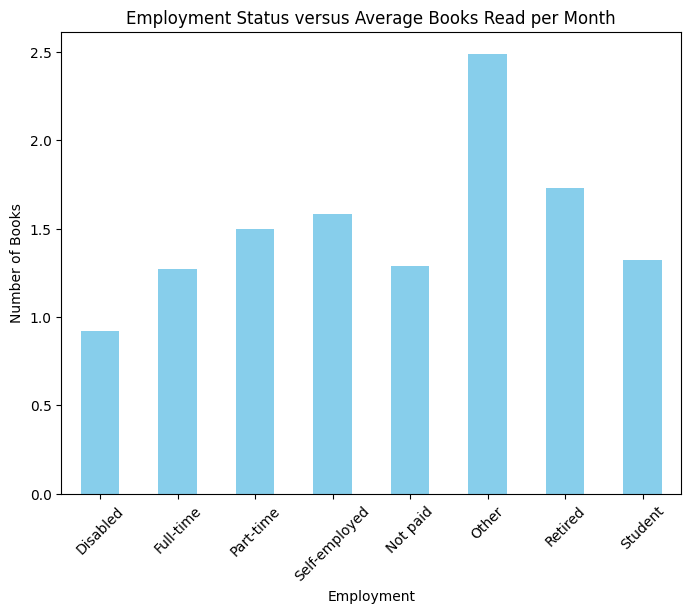

In [54]:
avg_books_per_employment = read_habit.groupby('Employment')['Ave books read per month'].mean()

shortened_labels_employment = avg_books_per_employment.index.map(short_labels_employment)

plt.figure(figsize=(8, 6))
avg_books_per_employment.plot(kind = 'bar', color = 'skyblue')
plt.title('Employment Status versus Average Books Read per Month')
plt.xlabel('Employment')
plt.ylabel('Number of Books')
plt.xticks(ticks=range(len(shortened_labels_employment)), labels=shortened_labels_employment, rotation=45)
plt.show()

#### Below an ANOVA test was completed to compare average books read per month with education level and it was determined that there is a statistically significant difference in the average number of books read per month based on employment status. 

In [55]:
groups = [group['Ave books read per month'].values for name, group in read_habit.groupby('Employment')]

f_statistic, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant differece in the number of books read per month based on employment status.")
else:
    print("There is no significant diference in the number of books read per month based on employment status.")

F-statistic: 4.074906874424286
P-value: 0.00018660609070901888
There is a significant differece in the number of books read per month based on employment status.


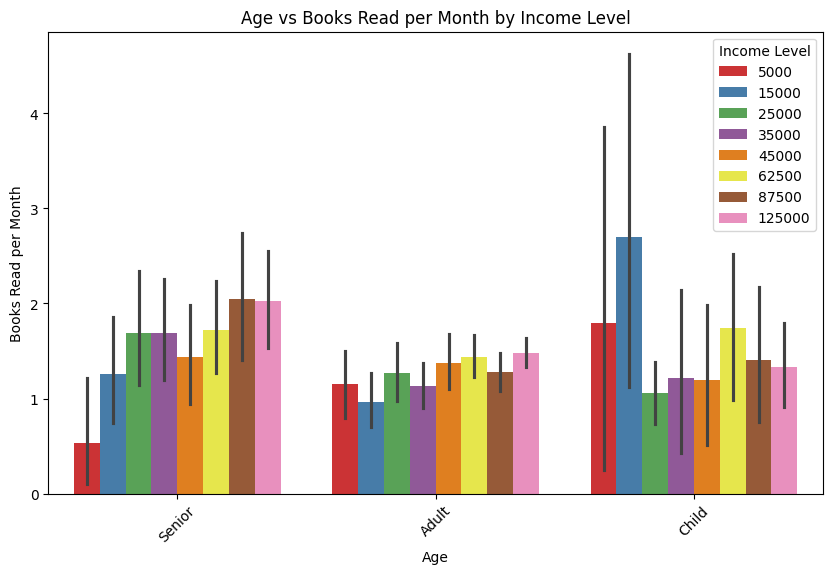

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(data=read_habit, x='Age group', y='Ave books read per month', hue='Midpoint Income', palette='Set1')
plt.title('Age vs Books Read per Month by Income Level')
plt.xlabel('Age')
plt.ylabel('Books Read per Month')
plt.legend(title='Income Level')
plt.xticks(rotation=45)  
plt.show()


#### Below the Pearson correlation coefficient between age and number of books read per month is found to be weak across all income levels. Meaning there doesn't seem to be a strong pattern in the data. 

In [57]:
income_groups = read_habit.groupby('Midpoint Income')

correlations = {}

for income, group in income_groups:
    correlation, _ = pearsonr(group['Age'], group['Ave books read per month'])
    correlations[income] = correlation

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Income', 'Pearson Correlation'])

correlation_df

,Income,Pearson Correlation
0,5000,-0.190177
1,15000,-0.071632
2,25000,0.064729
3,35000,0.116194
4,45000,0.018174
5,62500,0.096932
6,87500,0.112318
7,125000,0.113975


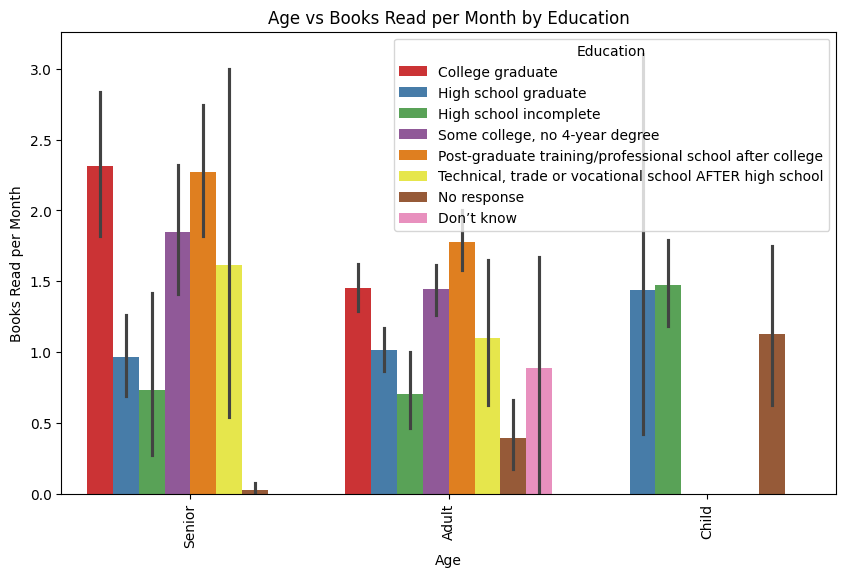

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(data=read_habit, x='Age group', y='Ave books read per month', hue='Education', palette='Set1')
plt.title('Age vs Books Read per Month by Education')
plt.xlabel('Age')
plt.ylabel('Books Read per Month')
plt.legend(title='Education')
plt.xticks(rotation=90)  # Rotates the x-axis labels if needed
plt.show()


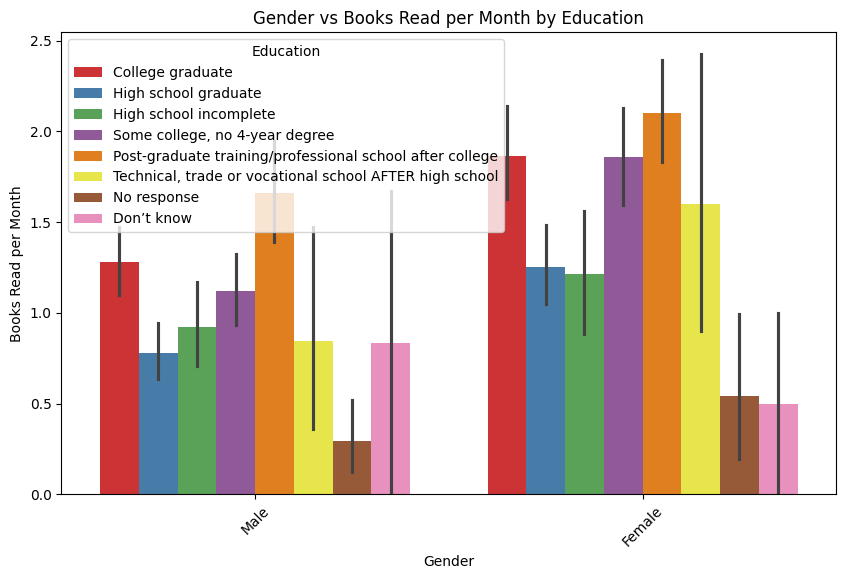

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(data=read_habit, x='Gender', y='Ave books read per month', hue='Education', palette='Set1')
plt.title('Gender vs Books Read per Month by Education')
plt.xlabel('Gender')
plt.ylabel('Books Read per Month')
plt.legend(title='Education')
plt.xticks(rotation=45)  # Rotates the x-axis labels if needed
plt.show()


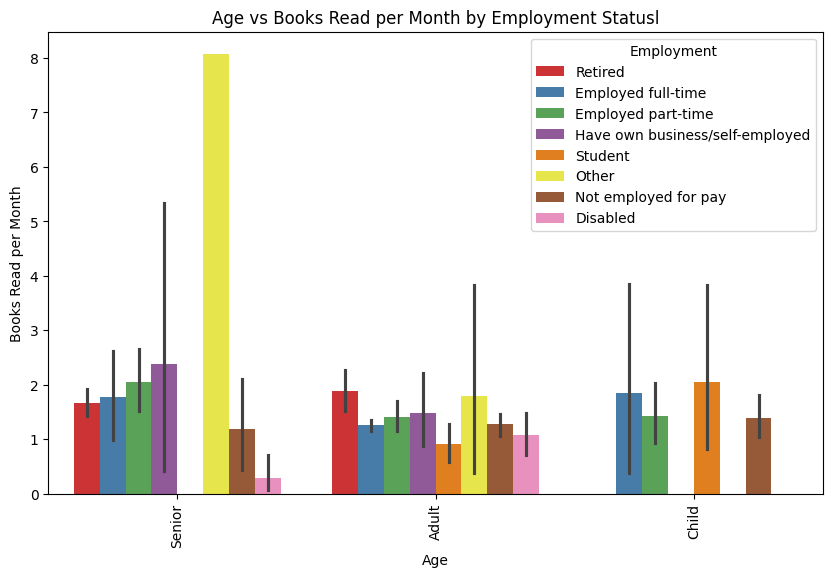

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(data=read_habit, x='Age group', y='Ave books read per month', hue='Employment', palette='Set1')
plt.title('Age vs Books Read per Month by Employment Statusl')
plt.xlabel('Age')
plt.ylabel('Books Read per Month')
plt.legend(title='Employment')
plt.xticks(rotation=90)  # Rotates the x-axis labels if needed
plt.show()


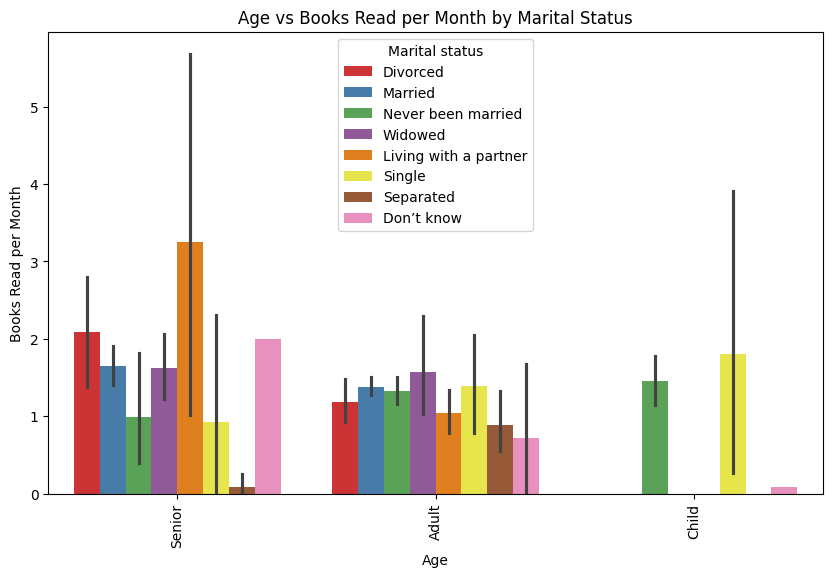

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(data=read_habit, x='Age group', y='Ave books read per month', hue='Marital status', palette='Set1')
plt.title('Age vs Books Read per Month by Marital Status')
plt.xlabel('Age')
plt.ylabel('Books Read per Month')
plt.legend(title='Marital status')
plt.xticks(rotation=90)  # Rotates the x-axis labels if needed
plt.show()


## Summary
### Defining the Question
#### The objective of this data analysis is to determine how age, gender, employment status, marital status, education and income relate to average number of books an individual reads per month.  This data source comes from [https://www.kaggle.com/datasets/vipulgote4/reading-habit-dataset/data](https://www.kaggle.com/datasets/vipulgote4/reading-habit-dataset/data).  This data might answer the objective because it contains data for almost 3000 individuals on their reading habits, personal income, employment status, age and other information.

### Data Cleaning
#### Corrections were made to column titles. Column titles were changed to increase readability. Corrections were made to the income ranges in the Income column. Columns of unneeded data were dropped from the data set. The rows that contained null values for income were dropped from the data set. It was determined that the Midpoint Income column is slightly right skewed therefore dropping the rows without an income was chosen versus filling the null values with the mean (since there is a skew, filling with the mean, would have further altered the integrity of the data set). Midpoint Income was reconverted to an int64 to eliminate the decimal place. Additionally, the null values in the Education column were replaced by Unknown. Data types for each column were checked to ensure they were properly assigned. 

### Engineered Features
#### A new column, Midpoint Income, was created that contained a single numerical value, from the original Income column. Instead of having a range of incomes, the midpoint of the range was calculated and entered into the Midpoint Income column for each row.  Additionally, a new feature was created by dividing the ages of the data set into three categories in the Age Group – child, adult and senior. The average number of books read per month was also calculated from the number of books reported to have been read in the last twelve months - this average was placed in a new column in the dataset. 

### Findings
#### For this data set: women appear to read a higher average of books per month than men (there is a significant difference in the number of books read per month per gender) (see chart Gender versus Average Books Read per Month). There is a significant difference in the number of books read per month based on educational level (those with more education appear to read more books (see chart Education Level versus Average Books Read Per Month)). There is a significant difference in the average books read per month based on employment status, however the definition of “Other” in the Employment column was not defined so it’s not clear what “Other” stands for – given this is not defined, it’s not clear that this is a valid finding. There is a statistically significant different int  the average number of books ready per month based on age group, with seniors reading the most books per month, followed by children and then adults (see chart Age Group versus Average Books Read per Month). 

#### Per the charts agove, the following do not appear to predict how many books an individual reads per month: income, marital status. There doesn’t seem to be a strong pattern of correlation between age, number of books read per month and income. It appears from the graph Age versus books ready by month by education that that Seniors with college/some college/technical training/professional training are reading more than adults with similar education. It also appears from the graph Gender versus Books read per Month by Education that females with college/some college/technical training/professional training are reading more books per months than males with same education. 

#### The main objective of this data analysis was to determine how age, gender, employment, marital status, education and income relate to average number of books an individual reads per month. For this data set, it has been determined that age, gender and education all impact the number of books read by an individual each month. 


### Summary
#### In conclusion, age, gender, and a higher level of education are associated wtih reading more books each month. Women tend to read more than men. Seniors read more than children who read mroe tahn adults. Income and marital status do not appear to impact average number of books read per month. 

### Recommendations
#### This is a small data set. In order to determine if these findings can be generalized to a larger population, a larger data set should be obtained. Additionally, these findings are limited given the geographical location of the individuals contributing to the data set is unknown. It is also unknown when and how this data was obtained. It is recommended that fu4rther analysis of this data could be completed with more advanced statistical methods. It is also recommended that to enlarge the data set, so that it could possibly be more valid to generalize to the larger population, that other data sets of simliar or related data be merged into this one to enlarge the data set. 